In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#**Stabilization of Cart Pole system**: 
> Consider the stabilization of cart pole system:
>
>
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1O1iM6MByfMyrO0txAMFb_miOqPNzFAvm" align="center" hspace="350px" vspace="0px"></p>
>
>
> In this example we did the following:
>*   Design the Linear feedback controller using pole placement technique
>*   Simulate the response of your controller on the linearized and nonlinear system, compare the results
>*   Initiate the simulation with point that is far from origin, discuss the difference between linearized and nonlinear systems
>
> [Here is the great illustration of the hardware implemintation](https://www.youtube.com/shorts/NJxBJ2LJY7w) 
>
>You may find the `.py` version of this notebook by following [this link](https://drive.google.com/file/d/1i7domG5HARUin4igzKvgHD8kliqjy23C/view?usp=sharing)


##**System Dynamics**: 

Recall the dynamics of cart-pole system:
\begin{equation}
\begin{cases} 
\left(M+m\right){\ddot {p}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{p} \cos \theta  \\
\end{cases}
\end{equation}

where $\theta$ is angle of the pendulum measured from the upper equilibrium and $p$ is position of cart


Choosing the state to be $\mathbf{x} = [\theta, \dot{\theta}, p, \dot{p}]^T$One may rewrite this dynamics in the state-space form as:
\begin{equation}
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{\theta} \\ 
\ddot{\theta} \\ 
\dot{p} \\ 
\ddot{p}
\end{bmatrix} 
= 
\begin{bmatrix}
\dot{\theta} \\ 
\frac{(M+m)g \sin \theta - mL \dot{\theta}^2 \sin\theta \cos\theta}{(M + m\sin^2 \theta)L} \\ 
\dot{x} \\ 
\frac{mg\sin\theta \cos\theta - mL\dot{\theta}^2 \sin \theta}{M + m\sin^2 \theta} \\ 
\end{bmatrix} 
+
\begin{bmatrix}
0 \\ 
\frac{\cos\theta}{(M + m\sin^2 \theta)L} \\ 
0 \\ 
\frac{1}{M + m\sin^2 \theta} \\ 
\end{bmatrix} u
\end{equation}


###**System parameters**: 
Let us choose the following parameters:

In [ ]:
m = 0.5 # mass of pendulum bob
M = 2 # mass of cart
L = 0.3 # length of pendulum
g = 9.81 # gravitational acceleration 


###**Linearized Dynamics**: 

Liniarization around the upper equilibrium $\mathbf{x} = [0,0,0,0]$ yields:

\begin{equation}
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{\theta} \\ 
\ddot{\theta} \\ 
\dot{p} \\ 
\ddot{p}
\end{bmatrix} 
=
\begin{bmatrix}
0 & 1 & 0 & 0\\
\frac{(M+m)}{M}\frac{g}{L} & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\frac{m}{M}g & 0 & 0 & 0 
\end{bmatrix} 
\begin{bmatrix}
\theta \\ 
\dot{\theta} \\ 
p \\ 
\dot{p}
\end{bmatrix} 
+
\begin{bmatrix}
0 \\
\frac{1}{ML} \\
0 \\
\frac{1}{M}
\end{bmatrix}
u
\end{equation}

In [ ]:
# System matrix
A = np.array([[0, 1, 0, 0],
             [(M + m)*g /(M*L), 0, 0, 0],
             [0,0,0,1],
             [m*g/M, 0, 0, 0]])
# Input matrix
B = np.array([[0],
             [1/(M*L)],
             [0], 
             [1/M]])

###**Controller Design**: 

Let us design the controller for linearized plant by placing poles (eigen values) on the left-hand side of complex plane, find descretization and pe


Desired poles:
 [-4 -3 -2 -1], 
Designed poles:
 [-4. -3. -2. -1.]


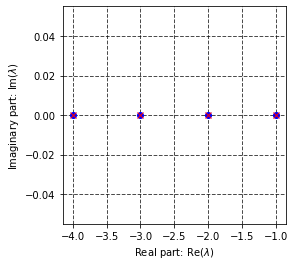

In [ ]:
from scipy.signal import place_poles

# Choose the poles locations
poles = np.array([-4, -3, -2, -1])
# Calculate the gain matrix
K = np.zeros(4)
# Check the closed loop poles 
Ac = A - B@K
eigs = np.linalg.eigvals(Ac)
print(f'Desired poles:\n {poles}, \nDesigned poles:\n {eigs}')



# Get the plot of desired and designed poles 
plt.figure(figsize=(4, 4))
plt.plot(poles.real, poles.imag, 'bo', label='Desired')
plt.plot(eigs.real, eigs.imag, 'rx',label='Actual')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
plt.ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
plt.show()

###**Simulation**:
We proceed with the simulation of designed controller, firstly we will define the simulation parameters: 

In [ ]:
# Time settings
t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

# Define initial point 
theta_0 = 1.2
p_0 = 0.0

# Set initial state 
x0 = [theta_0, # Initial pendulum angle
      0, # Initial pendulum angular speed
      p_0, # Initial cart position
      0] # Initial cart speed


####**Linearized dynamics**: 
Now let us simulate the response of linear controller on the **linearized** system:

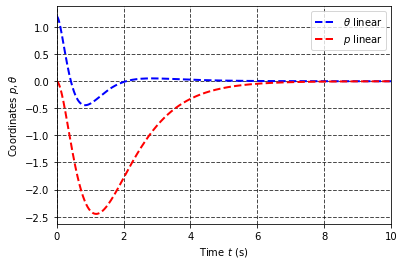

In [ ]:
# import integrator routine
from scipy.integrate import odeint 

# Define the linear ODE to solve
def linear_closed(x, t, A, B, K):
    # Linear controller
    u = - np.dot(K,x)  
    # Linearized dynamics
    dx = np.dot(A,x) + np.dot(B,u)
    return dx
# integrate system "sys_ode" from initial state $x0$
x_l = odeint(linear_closed, x0, t, args=(A, B, K,)) 
theta_l, dtheta_l, p_l, dp_l = x_l[:,0], x_l[:,1], x_l[:,2], x_l[:,3] 
# Plot the resulst
plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

####**Nonlinear dynamics**: 

First of all let us define the nonlinear system in form $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u})$ :

In [ ]:
s, c = np.sin, np.cos
# Nnonlinear cart-pole dynamics
def f(x, u):
    theta, dtheta, p, dp = x
    denominator = M + m*(s(theta)**2)
    ddtheta = ((M + m)*g*s(theta) - m* L * dtheta**2 *s(theta) * c(theta) + c(theta)*u)/(denominator * L)
    ddp = (m*g*s(theta)*c(theta) - m* L * dtheta**2 *s(theta) + u)/denominator
    return dtheta, ddtheta, dp, ddp

Now we will simulate similarly to linear case while using the same gains $\mathbf{K}$:

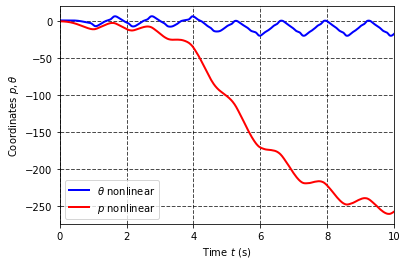

In [ ]:
def nonliear_closed(x, t, K):
    # Linear controller
    u = - np.dot(K,x)  
    # Nonlinear dynamics
    dx = f(x, u)
    return dx

# integrate system "sys_ode" from initial state $x0$
x_nl = odeint(nonliear_closed, x0, t, args=(K,)) 
theta_nl, dtheta_nl, p_nl, dp_nl = x_nl[:,0], x_nl[:,1], x_nl[:,2], x_nl[:,3] 
# Plot the resulst
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()


###**Comparison**: 
One may compare the linear and nonlinear responses by plotting them together:

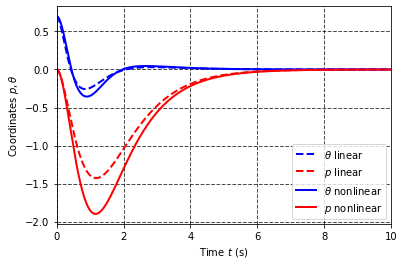

In [ ]:
plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

The difference in response depends on various factors, such as pole locations, initial point, system parameters etc. Try to play with this simulation, vary the parameters and compare the system responses. 


